In [1]:
import time
import numpy as np
from numpy import *
import matplotlib.pylab as plt
import operator
import pyscf
from pyscf import gto, scf, dft, tddft, data


#np.set_printoptions (linewidth=300)

elements = ['H' , 'He', 'Li', 'Be', 'B' , 'C' , 'N' , 'O' , 'F' , 'Ne',
    'Na', 'Mg', 'Al', 'Si', 'P' , 'S' , 'Cl', 'Ar', 'K' , 'Ca',
    'Sc', 'Ti', 'V' , 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn',
    'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y' , 'Zr',
    'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn',
    'Sb', 'Te', 'I' , 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd',
    'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb',
    'Lu', 'Hf', 'Ta', 'W' , 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg',
    'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th',
    'Pa', 'U' , 'Np', 'Pu'] 
hardness = [
0.47259288,
0.92203391,
0.17452888,
0.25700733,
0.33949086,
0.42195412,
0.50438193,
0.58691863,
0.66931351,
0.75191607,
0.17964105,
0.22157276,
0.26348578,
0.30539645,
0.34734014,
0.38924725,
0.43115670,
0.47308269,
0.17105469,
0.20276244,
0.21007322,
0.21739647,
0.22471039,
0.23201501,
0.23933969,
0.24665638,
0.25398255,
0.26128863,
0.26859476,
0.27592565,
0.30762999,
0.33931580,
0.37235985,
0.40273549,
0.43445776,
0.46611708,
0.15585079,
0.18649324,
0.19356210,
0.20063311,
0.20770522,
0.21477254,
0.22184614,
0.22891872,
0.23598621,
0.24305612,
0.25013018,
0.25719937,
0.28784780,
0.31848673,
0.34912431,
0.37976593,
0.41040808,
0.44105777,
0.05019332,
0.06762570,
0.08504445,
0.10247736,
0.11991105,
0.13732772,
0.15476297,
0.17218265,
0.18961288,
0.20704760,
0.22446752,
0.24189645,
0.25932503,
0.27676094,
0.29418231,
0.31159587,
0.32902274,
0.34592298,
0.36388048,
0.38130586,
0.39877476,
0.41614298,
0.43364510,
0.45104014,
0.46848986,
0.48584550,
0.12526730,
0.14268677,
0.16011615,
0.17755889,
0.19497557,
0.21240778,
0.07263525,
0.09422158,
0.09920295,
0.10418621,
0.14235633,
0.16394294,
0.18551941,
0.22370139]
#in Hartree
HARDNESS = dict(zip(elements,hardness))

In [2]:
# mol = gto.Mole()
# mol.build(atom = '\
# C         -4.89126        3.29770        0.00029;\
# O         -3.49307        3.28429       -0.00328;\
# H         -5.28213        2.58374        0.75736;\
# H         -5.28213        3.05494       -1.01161;\
# H         -5.23998        4.31540        0.27138;\
# H         -3.22959        2.35981       -0.24953',\
# basis = 'def2-SVP')


In [3]:
mol = gto.Mole()
mol.build(atom = '\
C         -3.15617        2.59898        0.79547;\
C         -1.79169        2.11570        0.42917;\
O         -0.80893        2.56621        0.99508;\
H         -1.66947        1.36193       -0.34183;\
H         -3.35300        2.38970        1.86780;\
H         -3.91803        2.07820        0.17854;\
H         -3.22824        3.69190        0.61449',\
basis = 'def2-SVP')

In [4]:
# mol = gto.Mole()
# mol.build(atom = 'O         -4.89126        3.29770        0.00029;\
# H         -3.49307        3.28429       -0.00328;\
# H         -5.28213        2.58374        0.75736', basis = 'def2-SVP', symmetry = True)

In [5]:
# mol = gto.Mole()
# mol.build(atom = '\
# C         -1.44673        2.80824       -0.07813;\
# O         -1.78998        3.80792       -0.69188;\
# N         -1.18291        1.66325       -0.74926;\
# N         -1.33221        2.85136        1.26946;\
# H         -1.53168        3.72026        1.78651;\
# H         -1.04365        2.01512        1.79805;\
# H         -1.26824        1.62382       -1.77554;\
# H         -0.89270        0.81388       -0.24298'\
# , basis = 'def2-SVP', symmetry = True)

In [6]:
# mf = dft.RKS(mol) 
# mf.conv_tol = 1e-12
# mf.grids.level = 9     # 0-9, big number for large mesh grids, default is 3
# mf.xc = 'b3lyp'
# mf.kernel()  #single point energy

In [7]:
# mf = dft.RKS(mol) 
# mf.conv_tol = 1e-12
# mf.grids.level = 9     # 0-9, big number for large mesh grids, default is 3
# mf.xc = 'cam-b3lyp'
# mf.kernel()  #single point energy

#ORCA: FINAL SINGLE POINT ENERGY = -115.576160742154
#Turbomole: total energy      =    -115.57615989622

In [8]:
mf = scf.RHF(mol) 
mf.conv_tol = 1e-13
mf.kernel()  #single point energy

converged SCF energy = -152.795188794927


-152.79518879492736

In [9]:
# CIS = pyscf.tdscf.rhf.CIS(mf)
# CIS.nstates = 5
# CIS.kernel()

In [10]:
# td = tddft.TDA(mf)
# start = time.time()
# td.kernel()    #compute first few excited states.
# end = time.time()
# print ('Pyscf time =', round(end-start,4))

In [11]:
#mf.analyze()
##MO energies

In [12]:
#mf.mulliken_pop_meta_lowdin_ao()
#population analysis
#mf.mulliken_pop()

In [13]:
#check whether a is symmetric
def check_symmetric(a, tol=1e-12):
    return np.all(np.abs(a-a.T) < tol)

In [14]:
def matrix_power (S,a):
    s,ket = np.linalg.eigh(S)
    # S = mf.get_ovlp() #.get_ovlp() is basis overlap matrix
    # S = np.dot(np.linalg.inv(c.T), np.linalg.inv(c))
    # #s are eigenvalues, must be all positive
    # #each column of ket is a eigenket
    s = s**a
    X = np.linalg.multi_dot([ket,np.diag(s),ket.T])
    #X == S^1/2
    return X

def orthonormalize (C):
    X = matrix_power(mf.get_ovlp(), 0.5)
    C = np.dot(X,C)
    return C
# C is orthonormalized coefficient matrix
# np.dot(C.T,C) is a identity matrix

def coefficient_matrix ():
    C = mf.mo_coeff
    # mf.mo_coeff is the coefficient matrix
    C = orthonormalize (C)
    return C
# rthogonalized MO coefficients 


In [15]:
def generateQ (atom_id):
    q = np.zeros([N_bf, N_bf])
    #N_bf is number Atomic orbitals, q is same size with C
    
    C = coefficient_matrix ()
    for i in range (0, N_bf):
        for p in range (0, N_bf):
            for mu in range (0, N_bf):
                if AO[mu] == atom_id:
                    #collect all basis functions centered on atom_id
                    # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
                    q[i,p] += C[mu,i]*C[mu,p]
                    #q[i,p] += 2*C[i,mu]*C[p,mu]
    return q

#home_made population analysis
# for atom_id in range (0, Natm):
#     print (check_symmetric(Qmatrix[atom_id], tol=1e-12))
#     m = 0
#     for i in range (0, occupied):
#         m += Qmatrix[atom_id][i,i]
#         #sum over occupied orbitals
#     print (m)


In [16]:
#function to return chemical hardness from dictionary HARDNESS
def Hardness (atom_id):
    atom = mol.atom_pure_symbol(atom_id) 
    return HARDNESS[atom]
# mol.atom_pure_symbol(atom_id) returns pure element symbol, no special characters

In [17]:
def eta (atom_A_id, atom_B_id):
    eta = (Hardness(atom_A_id) + Hardness(atom_B_id))/2
    return eta


In [18]:
def gammaJ (atom_A_id, atom_B_id):
    gamma_A_B_J = (R[atom_A_id, atom_B_id]**beta + (a_x * eta(atom_A_id, atom_B_id))**(-beta))**(-1/beta)
    return gamma_A_B_J

def gammaK (atom_A_id, atom_B_id):
    gamma_A_B_K = (R[atom_A_id, atom_B_id]**alpha + eta(atom_A_id, atom_B_id)**(-alpha)) **(-1/alpha)
    return gamma_A_B_K


In [19]:
#define two electron intergeral (pq|rs)
def ele_intJ (i,j,a,b):
    Natm = mol.natm 
    #number of atoms
    ijab = 0
    for atom_A_id in range (0, Natm):
        for atom_B_id in range (0, Natm):
            ijab += Qmatrix[atom_A_id][i,j] * Qmatrix[atom_B_id][a,b] * GammaJ[atom_A_id, atom_B_id]
    return ijab
        
def ele_intK (i,a,j,b):
    Natm = mol.natm 
    iajb = 0
    for atom_A_id in range (0, Natm):
        for atom_B_id in range (0, Natm):
            iajb += Qmatrix[atom_A_id][i,a] * Qmatrix[atom_B_id][j,b] * GammaK[atom_A_id, atom_B_id]
    return iajb

In [20]:
Natm = mol.natm
MOe = mf.mo_energy  
#an array of MO energies, in Hartree

occupied = len(np.where(mf.mo_occ > 0)[0])
#mf.mo_occ is an array of occupance [2,2,2,2,2,0,0,0,0.....]
virtual = len(np.where(mf.mo_occ == 0)[0])


AO = [int(i.split(' ',1)[0]) for i in mol.ao_labels()] 
# .split(' ',1) is to split each element by space, split once.
# mol.ao_labels() it is Labels of AO basis functions, AO is a list of corresponding atom_id
# AO == [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
N_bf = len(AO)

Qmatrix = [(generateQ(atom_id)) for atom_id in range (0, Natm)]
#a list of q matrix

R = pyscf.gto.mole.inter_distance(mol, coords=None) 
#Inter-particle distance array
# unit == ’Bohr’, Its value is 5.29177210903(80)×10^(−11) m

a_x = 0.38
beta1= 1.86
beta2=0
alpha1= 0.9
alpha2=0
beta = beta1 + beta2 * a_x
alpha = alpha1 + alpha2 * a_x


#build gammaJ and gammaK matrix
GammaJ = np.zeros([Natm, Natm])
for i in range (0, Natm):
    for j in range (0, Natm):
        GammaJ[i,j] = gammaJ (i,j)

GammaK = np.zeros([Natm, Natm])
for i in range (0, Natm):
    for j in range (0, Natm):
        GammaK[i,j] = gammaK (i,j)
# print (GammaJ)
# print (GammaK)

# print ('beta =', beta, 'alpha =', alpha)


In [21]:
#build A matrix
def build_A ():
    
    A = np.zeros ([occupied*virtual, occupied*virtual])
    m = -1
    for i in range (0, occupied):
        for a in range (occupied, N_bf):
            m += 1 #for each ia pair, it corresponds to a certain row
            n = -1
            for j in range (0, occupied):
                for b in range (occupied, N_bf):
                    n += 1 #for each jb pair, it corresponds to a certain column        
                    if i==j and a==b:
                        A[m,n] = (MOe[a]-MOe[i]) + 2*ele_intK(i,a,j,b) - ele_intJ(i,j,a,b)
                    else:
                        A[m,n] = 2*ele_intK(i,a,j,b) - ele_intJ(i,j,a,b)
    print (np.shape(A))
    print ('sTDA_A matrix built')
    return A

start = time.time()
A = build_A ()
end = time.time()
print ('A_sTDA building time =', round (end - start, 2))

(600, 600)
sTDA_A matrix built
A_sTDA building time = 31.74


In [22]:
print (check_symmetric(A, tol=1e-8))

True


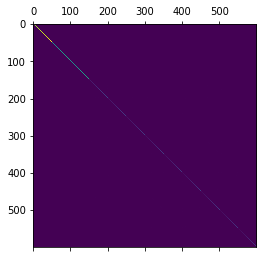

In [23]:
plt.matshow(A)
plt.show()

In [24]:
eigv,eigk = np.linalg.eigh(A)
idx = eigv.argsort()
eigv = eigv[idx]    #eigenvalues
eigk = eigk[:,idx]          #eigenkets, m*m

# #np.linalg.eigh guarantees you that the eigenvalues are sorted and uses a faster algorithm 
# #that takes advantage of the fact that the matrix is symmetric. 

print (np.round (eigv[:10]*27.21138624598853,4))   
# # ':n', first n elements; 'n:' all elements except firt n 


#methanol
# a_x = 0.38
# beta1= 1.86
# beta2=0
# alpha1= 0.9
# alpha2=0
#[12.2388 13.5994 13.7915 15.0407 15.1073 15.245  16.4534 16.5181 16.8506 17.3015]

[10.6515 12.8327 13.3805 14.5128 14.7768 14.8688 14.9778 15.0477 15.0578
 16.0027]


In [25]:
td = tddft.TDA(mf)
td.nstates = 5
td.conv_tol = 1e-13
td.kernel()

Excited State energies (eV)
[ 4.74398985  9.54998202  9.64102696 11.08547092 11.11130292]


(array([0.17433841, 0.35095537, 0.35430121, 0.40738355, 0.40833285]),
 [(array([[ 4.63637810e-06, -2.48384131e-11, -3.09089870e-11,
           -4.52952439e-10, -7.12227651e-06,  2.93303835e-11,
           -2.81197244e-12,  2.37941009e-11,  6.03512794e-06,
           -1.11151326e-10, -6.20786830e-06,  2.04319779e-11,
            9.50384920e-11, -2.20534160e-11, -3.93659893e-06,
            6.87618503e-10, -1.80336984e-10, -1.34062636e-11,
            4.15461519e-11,  4.57721931e-11,  1.27034381e-05,
           -8.46109665e-06, -7.99447336e-11,  6.67938474e-11,
            7.34551650e-06,  2.00506098e-10, -1.40227775e-06,
           -8.66416546e-07,  2.31222437e-11,  1.22233151e-10,
           -6.48854174e-06,  1.67152075e-09, -5.29360633e-11,
            1.68501441e-05, -7.82689760e-11,  7.73640553e-10,
            2.18686630e-05,  1.10626789e-11,  6.64663502e-10,
            7.35827830e-05, -2.25631470e-10,  3.98804194e-10,
            9.56134690e-09,  2.14428286e-04, -4.08078449e-11,


In [26]:
n = occupied * virtual
I = np.eye(n)
H = np.zeros((n,n))

vind, hdiag = td.gen_vind(mf)
for i in range (0, n):
    H[:,i] = vind (I[:, i])


In [27]:
energies, vectors = np.linalg.eigh(H)
print (energies[:5]*27.21138624598853)

[ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]


In [28]:
def davidson_A_matrix (A, k): # matrix A and how many eignvalues to solve
    start = time.time()
    n = np.shape(A)[0]
    tol = 1e-5      # Convergence tolerance
    max = 150      # Maximum number of iterations
    V = np.zeros((n,30*k)) #array of zeros, a container to hold guess vectors
    W = np.zeros((n,30*k)) #array of zeros, a container to hold transformed guess vectors, Av

    # Begin iterations
    
    m = 4*k  
    # m is size of subspace Hamiltonian, amount of initial guesses   
    #m=k works for H2, m=4k works for H2O
    for i in range(0, max):
        sum_convec = 0
        #total converged eigenvectors
        if sum_convec == k:
            break
        # print ('Iteration = ', Iteration)
        if i == 0:
            #initial guess
            sort = np.diag(A).argsort()
            for j in range(0,m):
                V[int(np.argwhere(sort == j)), j] = 1   #positions with lowest values set as 1
        for j in range(0,m):
            W[:, j] = np.dot(A,V[:,j])   # W = Av, create transformed guess vectors
        T = np.dot(V[:,:m].T, W[:,:m])  # T is subspace Hamiltonian
        THETA,S = np.linalg.eigh(T)  #Diagonalize the subspace Hamiltonian.
        idx = THETA.argsort()
        theta = THETA[idx]    #eigenvalues
        s = S[:,idx]          #eigenkets, m*m

        lasit_newvec = 0  #it records amount of new vector added in last iteration, ranging from 1 to k
        for x in range(0,k):      #looking at first k vecrors one by one, check if they are roots
            residual = np.dot((W[:,:m]- theta[x]*V[:,:m]), s[:,x])
            # np.dotV([:,:m])s[:,x]) can transform the subspace-eigenket back into full space eigenket
            norm = np.linalg.norm(residual)

            
            if norm <= tol:
                sum_convec += 1

            else:         
            # we didn't find correct eigenkets, so we create new guess vectors
                d = np.diag(A)-theta[x]
                d[(d<1e-16)&(d>=0)] = 1e-16
                d[(d>-1e-16)&(d<0)] = -1e-16   #kick out all small values
                new_vec = residual/d          
                #new guess vectors, core step of Davidson method
                
                new_vec = new_vec/np.linalg.norm (new_vec) 
                #normalize before GS

                for y in range (0, m + lasit_newvec):  #orthornormalize the new vector against all vectors
                    new_vec = new_vec - np.dot(V[:,y], new_vec) * V[:,y]   #/ np.linalg.norm(V[:,i])) = 1 should be after np.dot

                norm = np.linalg.norm (new_vec)
                if norm > 1e-16:
                    new_vec = new_vec/norm
                    V[:, m + lasit_newvec] = new_vec
                    lasit_newvec += 1
            
        m += lasit_newvec   
        #now m is size of subspace Hamiltonian in next iteration
       

    print ('Iteration =', i+1)

    end = time.time()
    Eigenkets = np.dot(V[:,:m], s[:, :k])
    print ('Davidson time (no vind function):', round(end-start,4))
    print (theta[:k]*27.21138624598853)
    return (theta[:k], Eigenkets[:,:k])
    #return (theta[:k])

# davidson_A_matrix(A, k)

In [29]:
# a = 1000 #dimension of H
# b = 3
# sparsity = 0.01
# H = np.zeros((a,a))
# for i in range(0,a):
#     H[i,i] = i + 1
# H = H + sparsity*np.random.randn(a,a)
# H = (H.T + H)/2   # A is a random Hermition

# E,vec = np.linalg.eig(H)
# idx = E.argsort()
# e = E[idx]
# print (' numpy   =', e[:10])  
# # Standard eigenvalues


# print (davidson_A_matrix (H, 10))

In [35]:
#davidson block
def sTDA_init_p_davidson (k, tol): 
    # function vind and how many eignvalues to solve
#     A = build_A ()
    start = time.time()
    
    vind, hdiag = td.gen_vind(mf) #vind() seems interfer with something and turned into a matrix
    n = len(hdiag)
    
#     tol = 1e-12      # Convergence tolerance
    max = 90      # Maximum number of iterations
    V = np.zeros((n,40*k)) #array of zeros, a container to hold guess vectors
    W = np.zeros((n,40*k)) #array of zeros, a container to hold transformed guess vectors
    I = np.eye(n)
    # Begin iterations
    m = 2*k  # m is size of subspace Hamiltonian, amount of initial guesses   #m=k works for H2, m=4k works for H2O
    for i in range(0, max):
        if i == 0:
           #eigv, eigk = davidson_A_matrix (A, m)
            eigv, eigk = np.linalg.eigh(A)
            for j in range(0,m):
                V[:, j] = eigk [:, j]

        for j in range(0, m):
            W[:, j] = vind (V[:,j])   #Hv, create transformed guess vectors
        
        T = np.dot(V[:,:m].T, W[:,:m])  # T is subspace Hamiltonian
        THETA,S = np.linalg.eigh(T)  #Diagonalize the subspace Hamiltonian.
        idx = THETA.argsort()
        theta = THETA[idx]    #eigenvalues
        s = S[:,idx]          #eigenkets, m*m

        sum_convec = 0
        lasit_newvec = 0  #it records amount of new vector added in last iteration, ranging from 1 to k
        for x in range(0,k):      #looking at first k vecrors one by one, check if they are roots
            residual = np.dot((W[:,:m]- theta[x]*V[:,:m]), s[:,x])
            norm = np.linalg.norm(residual)

            if norm > tol:
                new_vec = np.dot(np.linalg.inv(A - theta[x]*I),residual)
                #!!!!!preconditioner
             
                #print (np.shape (new_vec))
                new_vec = new_vec/np.linalg.norm (new_vec) #normalize before GS

                for y in range (0, m + lasit_newvec):  
                    #orthornormalize the new_guess_vector against all previous guess_vectors
                    new_vec = new_vec - np.dot(V[:,y], new_vec) * V[:,y]   
                    # np.linalg.norm(V[:,i])) = 1, should be after np.dot

                norm = np.linalg.norm (new_vec)
                if norm > 1e-16:
                    new_vec = new_vec/norm
                    V[:, m + lasit_newvec] = new_vec
                    lasit_newvec += 1
            else:
                sum_convec += 1

        m += lasit_newvec   #now m is size of subspace Hamiltonian in next iteration
        if sum_convec == k:
            break

    print ('Iteration =', i + 1)

    end = time.time()
    Eigenkets = np.dot(V[:,:m], s[:, :k])
    print ('sTDA as initial guess and preconditioner Davidson time:', round(end-start,4))
    return (theta[:k])

# print (27.21138624598853 * sTDA_init_p_davidson(5))
#TDA-TDDFT Excited State energies (eV)
#[ 8.73907158 10.77713237 11.26755044 12.20363899 12.27658757]




# Excited State energies (eV)
# [ 4.74398985  9.54998202  9.64102696 11.08547092 11.11130292]


In [36]:
#davidson block
def sTDA_p_davidson (k, tol): 
    # function vind and how many eignvalues to solve
    
    
#     A = build_A ()
    start = time.time()
    vind, hdiag = td.gen_vind(mf) #vind() seems interfer with something and turned into a matrix
    n = len(hdiag)
    
#     tol = 1e-12      # Convergence tolerance
    max = 90      # Maximum number of iterations
    V = np.zeros((n,40*k)) #array of zeros, a container to hold guess vectors
    W = np.zeros((n,40*k)) #array of zeros, a container to hold transformed guess vectors
    I = np.eye(n)
    # Begin iterations
    m = 2*k  # m is size of subspace Hamiltonian, amount of initial guesses   #m=k works for H2, m=4k works for H2O
    for i in range(0, max):
        if i == 0:
            #first step
            sort = hdiag.argsort()
            for j in range(0,m):
                V[int(np.argwhere(sort == j)),j] = 1
                #positions with lowest values set as 1


        for j in range(0, m):
            W[:, j] = vind (V[:,j])   #Hv, create transformed guess vectors
        T = np.dot(V[:,:m].T, W[:,:m])  # T is subspace Hmailtonian
        THETA,S = np.linalg.eigh(T)  #Diagonalize the subspace Hamiltonian.
        idx = THETA.argsort()
        theta = THETA[idx]    #eigenvalues
        s = S[:,idx]          #eigenkets, m*m


        lasit_newvec = 0  
        #it records amount of new vector added in last iteration, ranging from 1 to k
        sum_convec = 0
        for x in range(0,k):      
            #looking at first k subspace_eigenkets, check if they are roots
            residual = np.dot((W[:,:m]- theta[x]*V[:,:m]), s[:,x])
            norm = np.linalg.norm(residual)

            if norm > tol:
                new_vec = np.dot(np.linalg.inv(A - theta[x]*I),residual)
                #new guess vectors, core step of Davidson method

                new_vec = new_vec/np.linalg.norm (new_vec) 
                #normalize before GS

                for y in range (0, m + lasit_newvec):  
                    # orthornormalize the new_guess_vector against all previous guess_vectors
                    new_vec = new_vec - np.dot(V[:,y], new_vec) * V[:,y]   
                    # np.linalg.norm(V[:,i])) = 1, should be after np.dot

                norm = np.linalg.norm (new_vec)
                if norm > 1e-16:
                    new_vec = new_vec/norm
                    V[:, m + lasit_newvec] = new_vec
                    lasit_newvec += 1
            else:
                sum_convec += 1


        m += lasit_newvec   
        #now m is size of subspace Hamiltonian in next iteration
        if sum_convec == k:
            break

    print ('Iteration =', i + 1)

    end = time.time()
    Eigenkets = np.dot(V[:,:m], s[:, :k])
    print ('sTDA as preconditioner Davidson time:', round(end-start,4))
    return (theta[:k])

# print (27.21138624598853 * sTDA_p_davidson(5))
#Excited State energies (eV)
#[ 8.73907158 10.77713237 11.26755044 12.20363899 12.27658757]



In [37]:
#davidson block
def diagA_davidson (k, tol): 
    # function vind and how many eignvalues to solve
    
    start = time.time()
   
    vind, hdiag = td.gen_vind(mf) #vind() seems interfer with something and turned into a matrix
    n = len(hdiag)
    
#     tol = 1e-12      # Convergence tolerance
    max = 90      # Maximum number of iterations
    V = np.zeros((n,30*k)) #array of zeros, a container to hold guess vectors
    W = np.zeros((n,30*k)) #array of zeros, a container to hold transformed guess vectors
    I = np.eye(n)
    # Begin iterations
    m = 2*k  # m is size of subspace Hamiltonian, amount of initial guesses   #m=k works for H2, m=4k works for H2O
    for i in range(0, max):
        if i == 0:
            #first step
            sort = hdiag.argsort()
            for j in range(0,m):
                V[int(np.argwhere(sort == j)),j] = 1
                #positions with lowest values set as 1

        for j in range(0, m):
            W[:, j] = vind (V[:,j])   #Hv, create transformed guess vectors
        T = np.dot(V[:,:m].T, W[:,:m])  # T is subspace Hmailtonian
        THETA,S = np.linalg.eigh(T)  #Diagonalize the subspace Hamiltonian.
        idx = THETA.argsort()
        theta = THETA[idx]    #eigenvalues
        s = S[:,idx]          #eigenkets, m*m

        sum_convec = 0
        lasit_newvec = 0  #it records amount of new vector added in last iteration, ranging from 1 to k
        for x in range(0,k):      #looking at first k vecrors one by one, check if they are roots
            residual = np.dot((W[:,:m]- theta[x]*V[:,:m]), s[:,x])
            norm = np.linalg.norm(residual)

            if norm > tol:
                #norm > tol means we didn't find correct eigenkets, so we create new guess vectors
                d = hdiag-theta[i]
                #preconditioner
                d[(d<1e-8)&(d>=0)] = 1e-8
                d[(d>-1e-8)&(d<0)] = -1e-8
                #kick out all small values
                new_vec = residual/d

                #new_vec = np.dot(np.linalg.inv(A - theta[x]*I),residual)
                #new guess vectors, core step of Davidson method
                #print (np.shape (new_vec))
                new_vec = new_vec/np.linalg.norm (new_vec) #normalize before GS

                for y in range (0, m + lasit_newvec):  
                    #orthornormalize the new_guess_vector against all previous guess_vectors
                    new_vec = new_vec - np.dot(V[:,y], new_vec) * V[:,y]   
                    # np.linalg.norm(V[:,i])) = 1, should be after np.dot

                norm = np.linalg.norm (new_vec)
                if norm > 1e-16:
                    new_vec = new_vec/norm
                    V[:, m + lasit_newvec] = new_vec
                    lasit_newvec += 1
            else:
                sum_convec += 1


        m += lasit_newvec   #now m is size of subspace Hamiltonian in next iteration
        if sum_convec == k:
            break

    print ('Iteration =', i + 1)

    end = time.time()
    Eigenkets = np.dot(V[:,:m], s[:, :k])
    print ('A.diag as preconditioner Davidson time:', round(end-start,4))
    return (theta[:k])

# print (27.21138624598853 * diagA_davidson(5))
# Methanol Excited State energies (eV)
#[ 8.73907158 10.77713237 11.26755044 12.20363899 12.27658757]



In [38]:
print (27.21138624598853 * sTDA_init_p_davidson(5,1e-11))
print (27.21138624598853 * sTDA_p_davidson(5,1e-11))
print (27.21138624598853 * diagA_davidson(5,1e-11))


# Acetaldehyde Excited State energies (eV)
# [ 4.74398985  9.54998202  9.64102696 11.08547092 11.11130292] built-in method 
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302] reproduced A matrix from vind() function 




# 1e-4， Acetaldehyde
# Iteration = 9
# sTDA as initial guess and preconditioner Davidson time: 4.1452
# [ 4.7439899   9.54998214  9.6410271  11.08547116 11.11130306]
# Iteration = 10
# sTDA as preconditioner Davidson time: 4.9058
# [ 4.74398995  9.54998212  9.64102708 11.08547104 11.11130312]
# Iteration = 12
# A.diag as preconditioner Davidson time: 5.8675
# [ 4.7439899   9.54998214  9.64102705 11.08547104 11.1113031 ]
# !!!!!inaccurate!!!!



# 1e-5， Acetaldehyde
# Iteration = 10
# sTDA as initial guess and preconditioner Davidson time: 4.9217
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# Iteration = 12
# sTDA as preconditioner Davidson time: 6.4569
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# Iteration = 14
# A.diag as preconditioner Davidson time: 7.7608
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]


# 1e-6， Acetaldehyde
# Iteration = 11
# sTDA as initial guess and preconditioner Davidson time: 5.959
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# Iteration = 13
# sTDA as preconditioner Davidson time: 7.4774
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# Iteration = 16
# A.diag as preconditioner Davidson time: 9.8503
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]

# 1e-7， Acetaldehyde
# Iteration = 13
# sTDA as initial guess and preconditioner Davidson time: 7.7582
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# Iteration = 15
# sTDA as preconditioner Davidson time: 9.5674
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# Iteration = 17
# A.diag as preconditioner Davidson time: 10.9235
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]


# 1e-8， Acetaldehyde
# Iteration = 14
# sTDA as initial guess and preconditioner Davidson time: 8.9015
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# (600, 600)
# sTDA_A matrix built
# Iteration = 16
# sTDA as preconditioner Davidson time: 10.7825
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# Iteration = 18
# A.diag as preconditioner Davidson time: 12.3104
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]

# 1e-9， Acetaldehyde
# Iteration = 15
# sTDA as initial guess and preconditioner Davidson time: 10.7357
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# Iteration = 17
# sTDA as preconditioner Davidson time: 12.8471
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# Iteration = 19
# A.diag as preconditioner Davidson time: 14.5845
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]





# 1e-10， Acetaldehyd
# Iteration = 16
# sTDA as initial guess and preconditioner Davidson time: 12.1489
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# Iteration = 18
# sTDA as preconditioner Davidson time: 14.0931
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# Iteration = 20
# A.diag as preconditioner Davidson time: 15.9098
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]

# 1e-11， Acetaldehyd
# Iteration = 17
# sTDA as initial guess and preconditioner Davidson time: 13.3904
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# Iteration = 19
# sTDA as preconditioner Davidson time: 15.8702
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# Iteration = 21
# A.diag as preconditioner Davidson time: 17.3899
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]




# 1e-12， Acetaldehyde
# Iteration = 18
# sTDA as initial guess and preconditioner Davidson time: 13.9984
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# Iteration = 20
# sTDA as preconditioner Davidson time: 16.4304
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
# Iteration = 22
# A.diag as preconditioner Davidson time: 18.2717
# [ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]

Iteration = 17
sTDA as initial guess and preconditioner Davidson time: 13.4345
[ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
Iteration = 19
sTDA as preconditioner Davidson time: 15.4745
[ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]
Iteration = 21
A.diag as preconditioner Davidson time: 17.4291
[ 4.74398989  9.5499821   9.64102704 11.08547101 11.11130302]


In [ ]:
#function to return distance between two atoms
# def distance (atom_A_id, atom_B_id):
# #   distance = R [atom_A_id, atom_B_id]
#     a = mol.atom_coord(atom_A_id) #coordinates of atom A
#     b = mol.atom_coord(atom_B_id) #coordinates of atom B
#     distance = np.linalg.norm (a - b)
#     return distance
# #(mol.atom_coord(atom_id)) is to return the coordinates of a certain atom, it is a ndarray


#array for the coordinates (in Bohr) of each atom 1 Bohr = 0.529177 Angstrom
#print (mol.unit)

In [ ]:
#nocc = mol.nelectron 
# mol.nelectron is number of electrons, not necessary the number of MOs